In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('food-hygiene-ratings-website-traffic-january-2018-to-december-2018.csv')
df

,Date,Visits,UniqueVisitors,Pageviews
0,2018-01-01,10620,9575,45765
1,2018-01-02,8912,8061,42513
2,2018-01-03,9073,8074,42334
3,2018-01-04,9225,8290,46141
4,2018-01-05,14470,13253,74009
...,...,...,...,...
360,2018-12-27,12206,10905,51579
361,2018-12-28,13362,11994,57672
362,2018-12-29,14926,13519,64790
363,2018-12-30,13479,12252,57667


In [3]:
df.duplicated()#for checking duplicate values

0      False
1      False
2      False
3      False
4      False
       ...  
360    False
361    False
362    False
363    False
364    False
Length: 365, dtype: bool

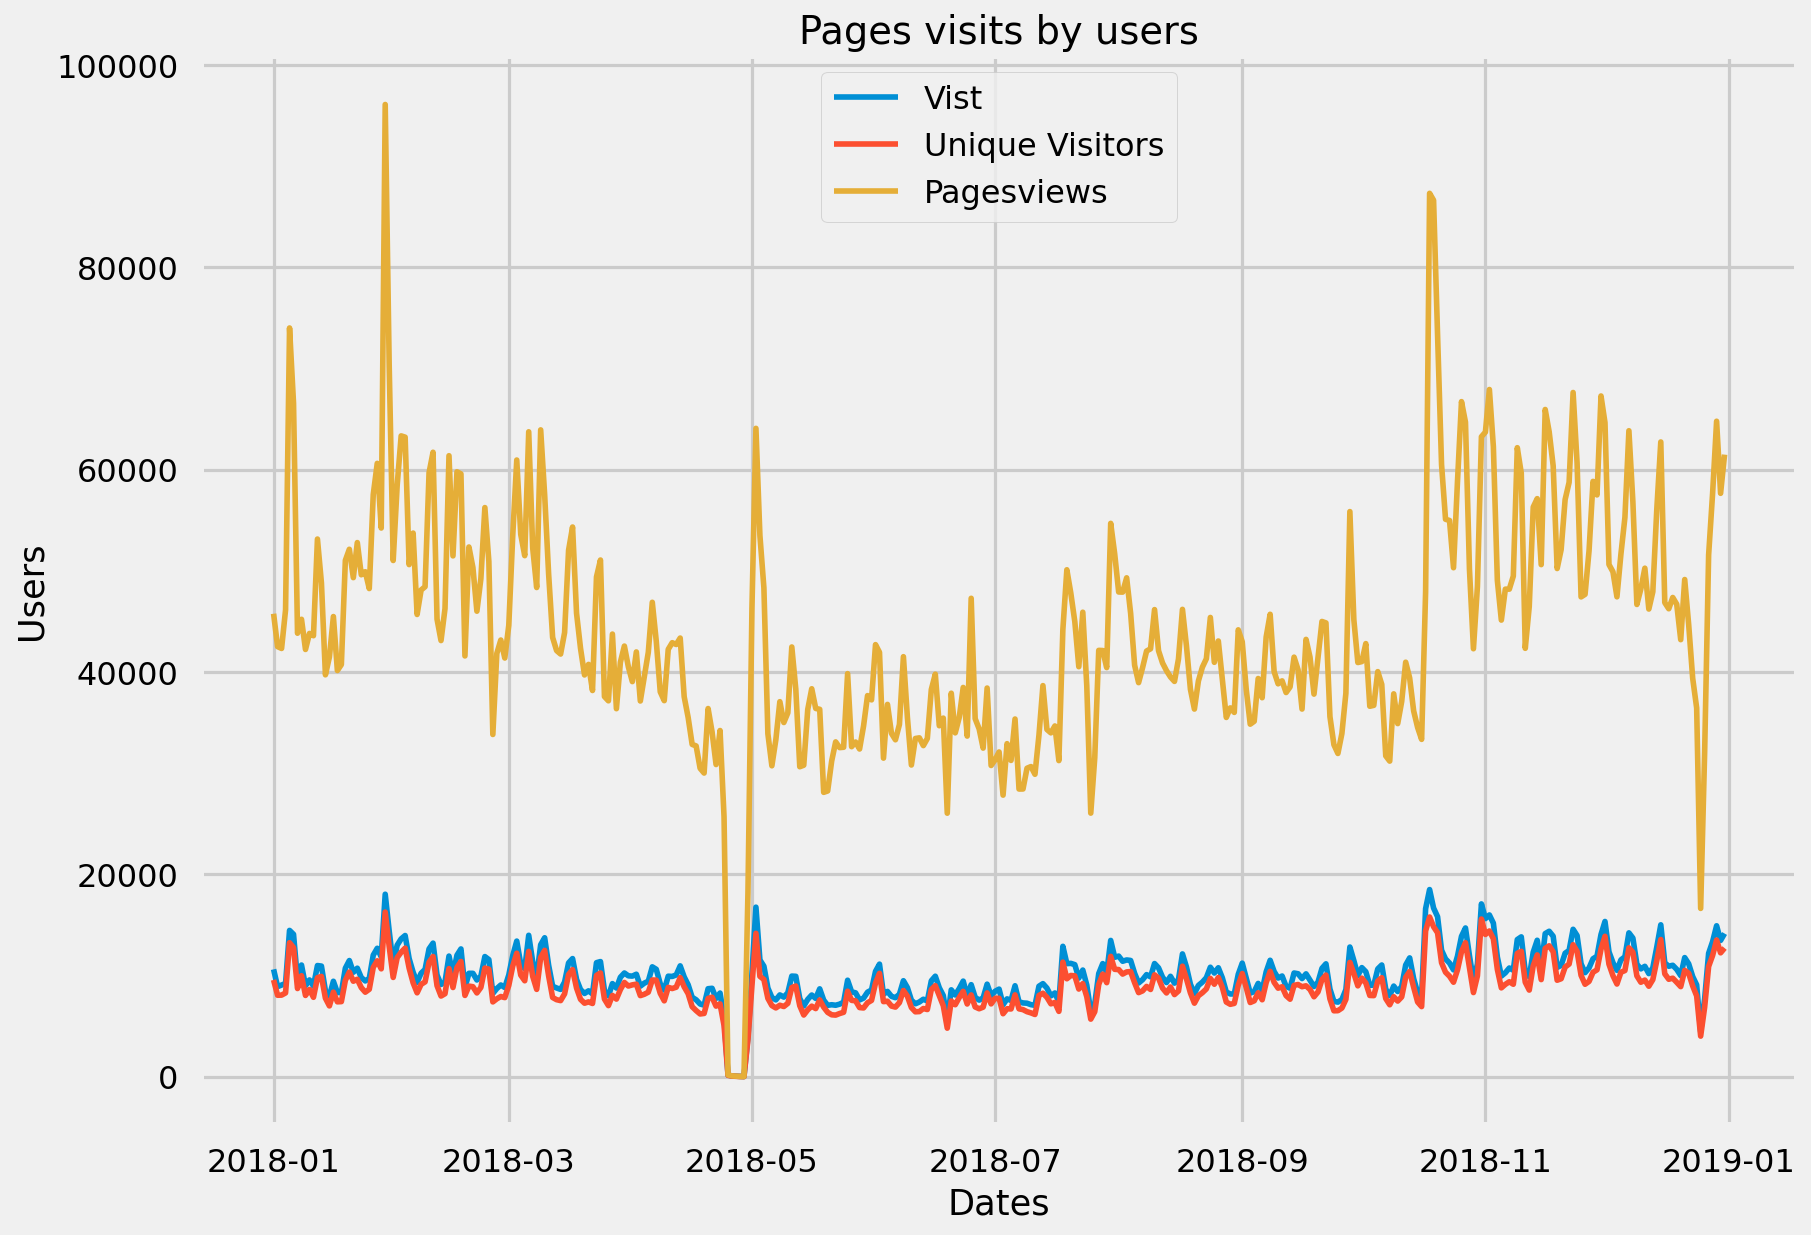

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

# this fucntion is for plot size
def fig_size(size):
    return plt.figure(dpi=size)

# this function is for the title of plot
def title_chart(t):
    return plt.title(t)

# this function is for plot style
def fig_style(style):
    return plt.style.use(style)

# this function is for ploting line chart
def draw_line_plot(x, y, label):
    pt = plt.plot(x, y, label = label)
    return(pt)

# calling functions
fig_size(144)
title_chart('Pages visits by users')
fig_style('_mpl-gallery')

draw_line_plot(df['Date'], df['Visits'], label = 'Vist')
draw_line_plot(df['Date'], df['UniqueVisitors'], label='Unique Visitors')
draw_line_plot(df['Date'], df['Pageviews'], label='Pagesviews')
plt.xlabel('Dates')
plt.ylabel('Users')

plt.legend()
plt.tight_layout()
plt.show()

In [12]:
# converting data into pandas data frame
df.index = pd.to_datetime(df['Date'], df['Visits'], df['UniqueVisitors'], df['Pageviews'])
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [13]:
# grouping data into months
df_resample = df.resample('M').sum() # converting data in month wise
df_resample

,Visits,UniqueVisitors,Pageviews
Date,,,
2018-01-31,331477,297716,1588538
2018-02-28,301013,269107,1426871
2018-03-31,319453,284869,1463553
2018-04-30,220223,195815,915093
2018-05-31,266677,234653,1141164
2018-06-30,251922,224906,1068584
2018-07-31,281648,250793,1146295
2018-08-31,310489,277175,1289897
2018-09-30,289273,258600,1197875


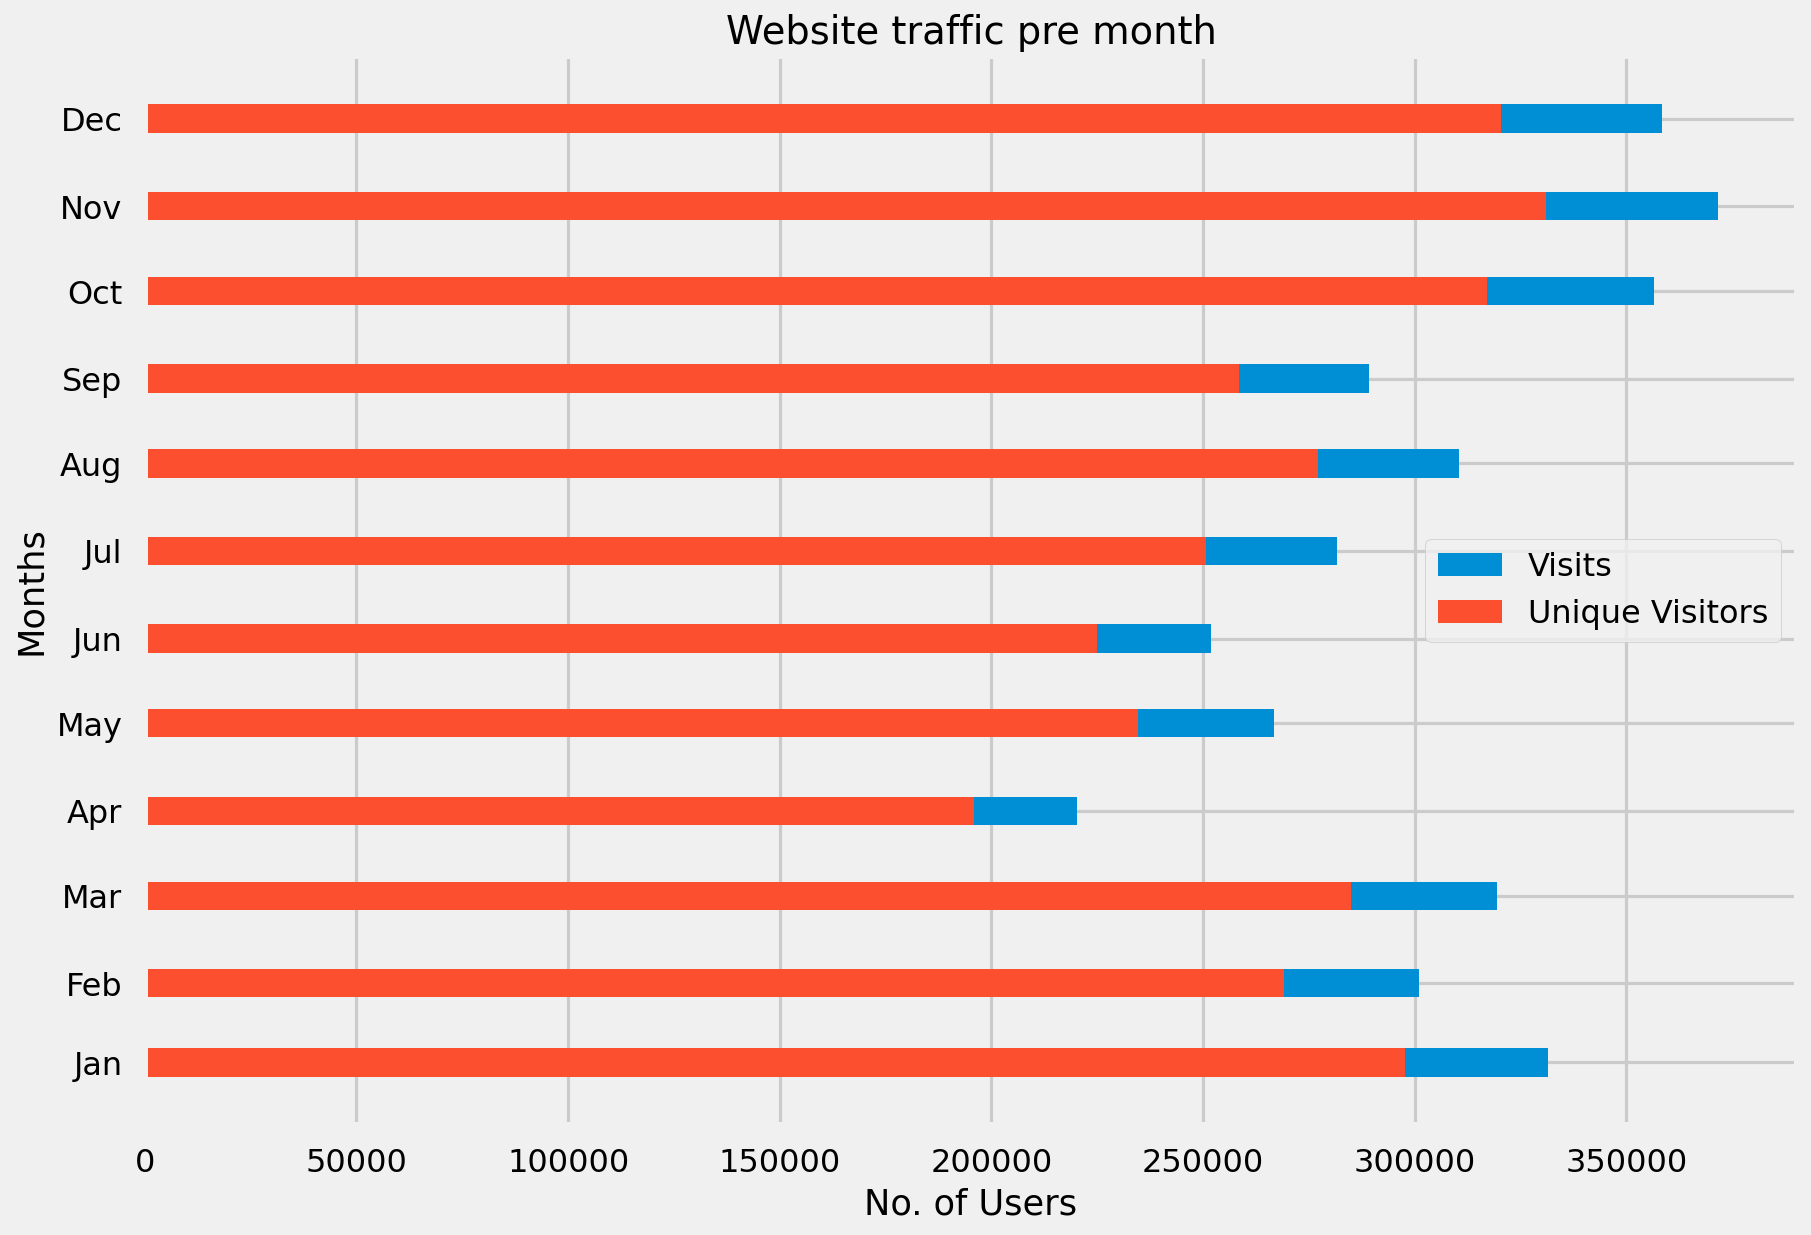

In [15]:
# ploting bar chart
fig_size(144)
title_chart('Website traffic pre month')
fig_style('seaborn-poster')

barwidth=10.0
plt.barh(df_resample.index.values, df_resample['Visits'], height=barwidth, label='Visits')
plt.barh(df_resample.index.values, df_resample['UniqueVisitors'], height=barwidth, label='Unique Visitors')
plt.legend()
plt.xlabel("No. of Users")
plt.ylabel("Months")
plt.yticks(df_resample.index.values,('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
plt.savefig('ads_bar_plot.png')
plt.tight_layout()
plt.show()

In [16]:
# calculate the sum of whole column
visit_sum = df_resample['Visits'].sum()
unique_sum = df_resample['UniqueVisitors'].sum()
print('first:', visit_sum, 'second:', unique_sum)

first: 3659083 second: 3262169


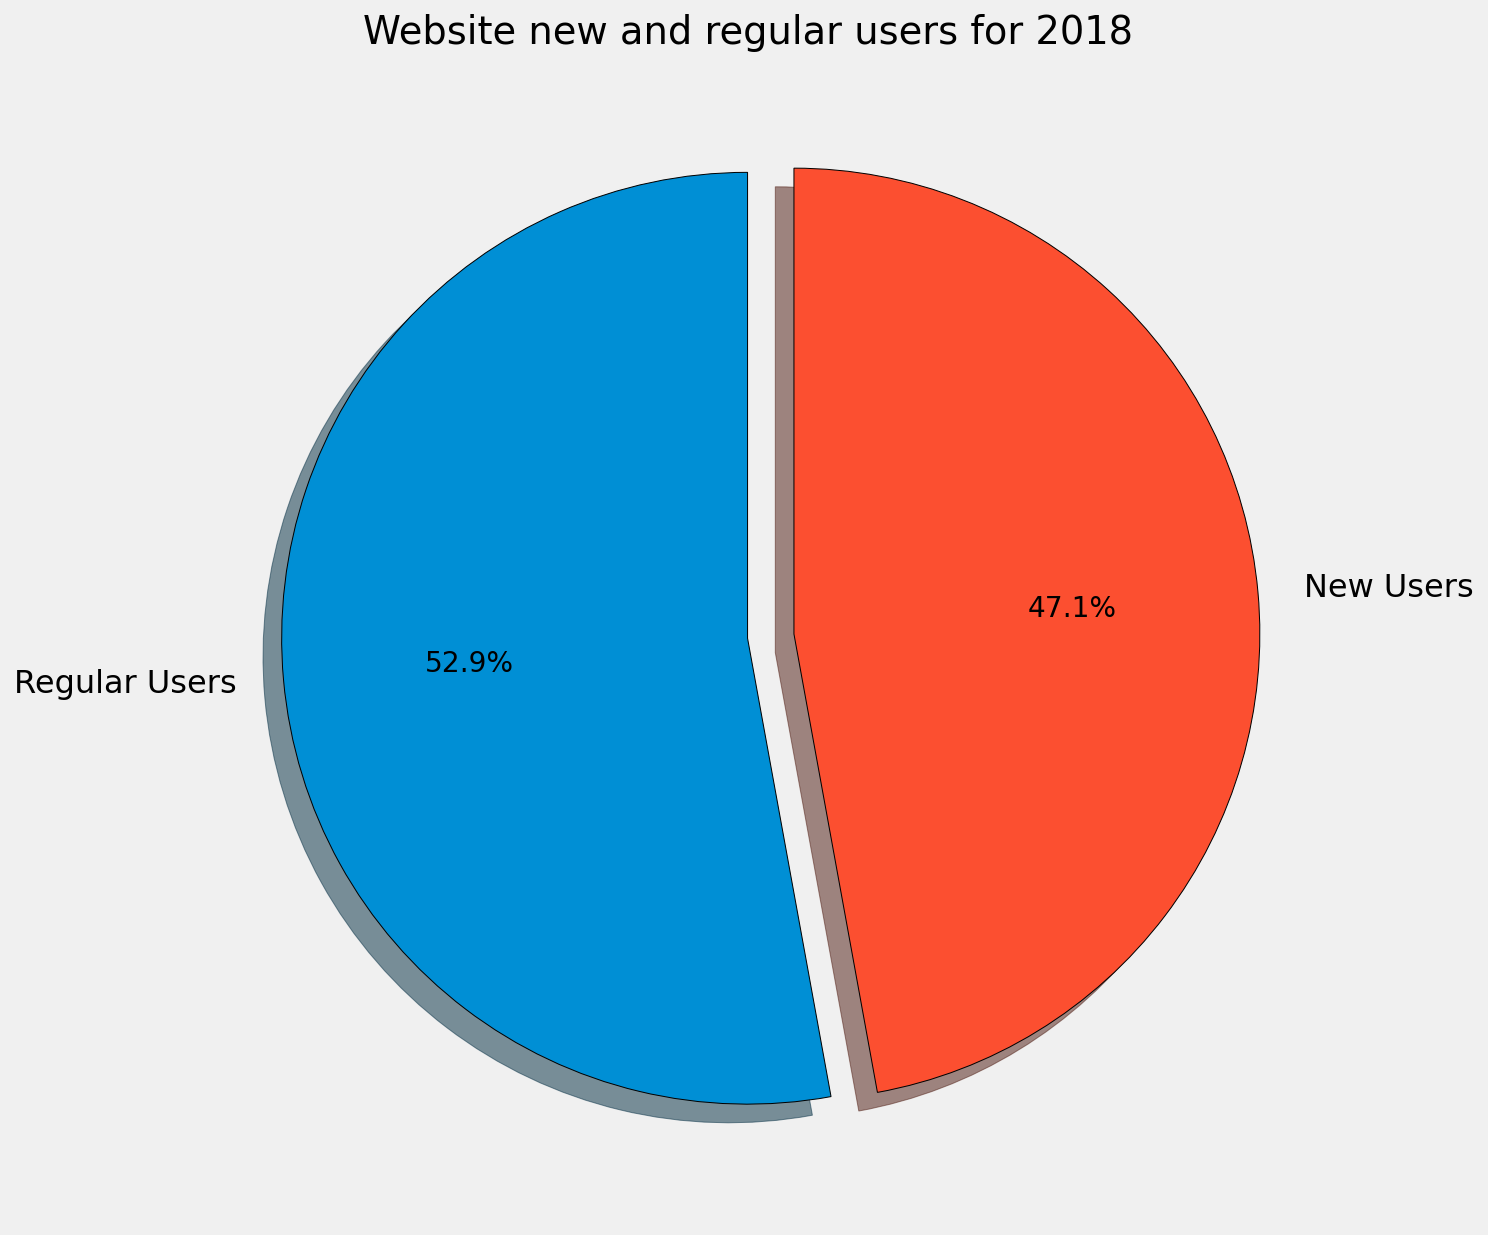

In [17]:

fig_size(144)
title_chart('Website new and regular users for 2018')
fig_style('fivethirtyeight')

slices = [visit_sum, unique_sum]
labels = ['Regular Users', 'New Users',]
explode = [0, 0.1] # this is use to take out the slice a little bit


# autopct is for percentage & wedgeprops is for edge color
plt.pie(slices, labels=labels, explode=explode, shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
plt.savefig('ads_pie_plot.png')
plt.tight_layout()
plt.show()